# TFY4345 Computational Assignment 1: Projectile motion

## Mathias Kristensen &amp; Harald Bjerkeli

In [ ]:
### IMPORTS
import numpy as np # Linalg
import matplotlib.pyplot as plt # Plots

### Differential eqns. with general drag based on particle state

In [ ]:
def diff_eqns(state, drag, g=-9.81):
    """ Evaluates the drag differential for the given state, feed to RK4 'function' parameter
        Feed to RK4 'function' parameter."""

    return np.array([   state[2],            # dx
                        state[3],            # dy
                        drag(state)*state[2]**2,    # dvx
                        g + drag(state)*state[3]**2]) # dvy

### RK4 - Integrator

In [ ]:
def RK4(Nt, dt, state0, t0, function, drag, g):
    """ 4th order Runga Kutta function for ODE solving """
    states = [state0]
    times = [t0]

    for n in range(Nt):
        F1 = function(states[n]            , drag, g )
        F2 = function(states[n] + 0.5*dt*F1, drag, g )
        F3 = function(states[n] + 0.5*dt*F2, drag, g )
        F4 = function(states[n] +     dt*F3, drag, g )

        states.append(np.array(states[n]+(dt/6)*(F1 + 2*F2 + 2*F3 + F4)))
        times.append(times[n]+dt)

        # Checks if projectile has hit the ground
        if states[n+1][1] < 0:
          return np.array(states), np.array(times)

    
    print(f"Maxed out iterations at {Nt} iterations")
    return np.array(states), np.array(times)

### Task 1a)

For the analytical solution without drag we get that height is $s_y = v_{0,y}t - \frac{1}{2}gt^2$, looking at the roots when $s_y = 0$ gives $t = 0, \frac{2v_{0,y}}{g}$. Now we can insert it into the horisontal distance $s_x = v_{0,x}t$, since there's no horisontal acceleration. Using intial veloctity $v_0=700m/s$ and the x- and y-components $v_{0,x} = v_0\cos(\theta)$ and $v_{0,y} = v_0\sin(\theta)$ we get the final result $s_x = \frac{2v_0^2}{g}\cos(\theta)\sin(\theta)$. For the test values $v_0 = 700m/s$ and $\theta = 45 ^\circ$ we get $s_x = 49949m$

In [ ]:
# Task sheet (Table 1): GIVEN CONSTANTS
B2m = 4 * 10**(-5)
y0 = 10**(4) 
a = 6.5 * 10**(-3)
alpha = 2.5

### OTHER DEFINED CONSTANTS
# mass
# Gravitational acceleration, assumed constant
g = -9.81
T0 = 293.15 # room temperature in Kelvin

# Max number of iterations
Nt = (int)(1e30)
t0 = 0.0
dt = .1

#Initial Values
init_vel = 700
angle = 45 # degrees

state0 = np.array([ 0.0, # x
                    0.0, # y
                    init_vel*np.cos(np.radians(angle)), # vx
                    init_vel*np.sin(np.radians(angle))]) # vy
#state0 = np.array([-5.69100585, 11.47078918, 38.50602762, 39.32430486])

no_drag = lambda state: 0

# Integrates with no drag
states, t = RK4(Nt, dt, state0, t0, diff_eqns, no_drag, g)

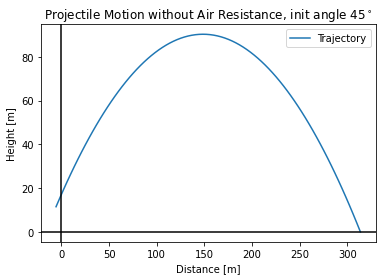

313.90902339599967m langt


In [ ]:
### PLOTTING

fig , ax = plt.subplots ()

ax.set_title(r'Projectile Motion without Air Resistance, init angle $45^\circ$')
ax.set_xlabel('Distance [m]')
ax.set_ylabel('Height [m]')
# Plot the trajectory
plt.plot(states[:,0], states[:,1], label = 'Trajectory')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
ax.legend()
plt.show()

print(f"{states[-1,0]}m langt")

In [ ]:
dts = np.linspace(0.001, 0.1, 100)
xs = []

for dt in dts:
    xs.append(RK4(Nt, dt, state0, t0, diff_eqns, no_drag, g)[0][-1,0])

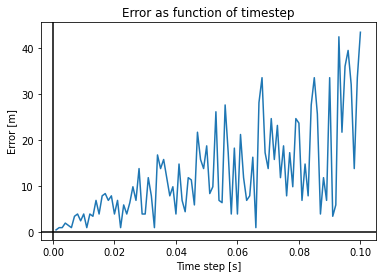

In [ ]:
### PLOTTING
fig , ax = plt.subplots ()

ax.set_title(r'Error as function of timestep')
ax.set_xlabel('Time step [s]')
ax.set_ylabel('Error [m]')
# Plot the trajectory
plt.plot(dts, np.array(xs)-49949)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()

Seems to converge towards the analytical value with lower step size.

### Task 1b)

In [ ]:
ez_drag = lambda state: -B2m

iso_drag = lambda state: -np.exp(-state[1]/y0) * B2m

adia_drag = lambda state: -(1-a*state[1]/T0)**alpha * B2m

In [ ]:
# Integrates easy drag
dt = 0.01
states_ez, t = RK4(Nt, dt, state0, t0, diff_eqns, ez_drag, g)

# Integrates isothermal drag
states_iso, t = RK4(Nt, dt, state0, t0, diff_eqns, iso_drag, g)

# Integrates adiabatic drag 
states_adia, t = RK4(Nt, dt, state0, t0, diff_eqns, adia_drag, g)


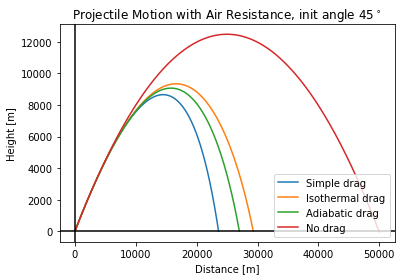

In [ ]:
### PLOTTING

fig , ax = plt.subplots ()

ax.set_title(r'Projectile Motion with Air Resistance, init angle $45^\circ$')
ax.set_xlabel('Distance [m]')
ax.set_ylabel('Height [m]')
# Plot the trajectory
plt.plot(states_ez[:,0], states_ez[:,1], label = 'Simple drag')
plt.plot(states_iso[:,0], states_iso[:,1], label = 'Isothermal drag')
plt.plot(states_adia[:,0], states_adia[:,1], label = 'Adiabatic drag')
plt.plot(states[:,0], states[:,1], label = 'No drag')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
ax.legend()
plt.show()

In [ ]:
### Gets maxima for different air models with different angels


n_angles = 1000
angles = np.linspace(1/1000, np.pi/2, n_angles)

states0 = np.array([np.zeros(n_angles), # x
                    np.zeros(n_angles), # y
                    init_vel*np.cos(angles), # vx
                    init_vel*np.sin(angles)]) # vy


states0 = np.transpose(states0)

max_ez = 0
max_iso = 0
max_adia = 0

optimal_ez = 0
optimal_iso = 0
optimal_adia = 0

for n in range(n_angles):
    
    ez = RK4(Nt,dt,states0[n],t0,diff_eqns,ez_drag,g)[0]
    if max(ez[:,0]) > max_ez:
        max_ez = max(ez[:,0])
        optimal_ez = angles[n]
    
    iso = RK4(Nt,dt,states0[n],t0,diff_eqns,iso_drag,g)[0]
    if max(iso[:,0]) > max_iso:
        max_iso = max(iso[:,0])
        optimal_iso = angles[n]
    
    adia = RK4(Nt,dt,states0[n],t0,diff_eqns,adia_drag,g)[0]
    if max(adia[:,0]) > max_adia:
        max_adia = max(adia[:,0])
        optimal_adia = angles[n]

In [ ]:
print(f"\t\tDist.(m)\tAngle(deg)")
print(f"Easydrag: \t{ max_ez:.0f}m\t\t{np.degrees(optimal_ez):.3f}")
print(f"Isodrag: \t{max_iso:.0f}m\t\t{np.degrees(optimal_iso):.3f}")
print(f"Adiadrag: \t{max_adia:.0f}m\t\t{np.degrees(optimal_adia):.3f}")

		Dist.(m)	Angle(deg)
Easydrag: 	23865m		39.402
Isodrag: 	29339m		46.874
Adiadrag: 	27012m		44.714


### Task 2 Paris gun

In [ ]:
m = 106 #kg
v_init = 1640 #m/s

state0 = np.array([
    0,
    0,
    v_init*np.cos(optimal_adia),
    v_init*np.sin(optimal_adia)
])


parisgun_results, t = RK4(Nt,dt,state0,t0,diff_eqns,adia_drag,g)

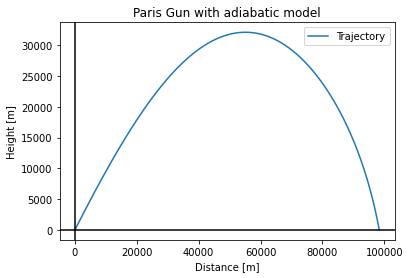

Paris Gun has a maximum range of 98397m
Max altitude of 32098m
Flight time of 152s


In [ ]:
### PLOTTING

fig , ax = plt.subplots ()

ax.set_title("Paris Gun with adiabatic model")
ax.set_xlabel('Distance [m]')
ax.set_ylabel('Height [m]')
# Plot the trajectory
plt.plot(parisgun_results[:,0], parisgun_results[:,1], label = 'Trajectory')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
ax.legend()
plt.show()

print(f"Paris Gun has a maximum range of {parisgun_results[-1,0]:.0f}m")
print(f"Max altitude of {max(parisgun_results[:,1]):.0f}m")
print(f"Flight time of {t[-1]:.0f}s")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c31ad5fa-496d-4562-976d-ee890ed29a86' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>